In [40]:
import pandas as pd
from utils import load_json

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import mpltern

print("Setup Complete")

Setup Complete


In [41]:
meta_two_hand_weapons = load_json("data/filtered_meta_two_hand_weapons.json")
meta_weapons = load_json("data/filtered_meta_weapons.json")

In [42]:
def get_weapon_names(weapons):
    return [weapon_info["name"] for weapon_id, weapon_info in weapons.items()]

meta_weapon_names = get_weapon_names(meta_weapons)
meta_two_hand_weapon_names = get_weapon_names(meta_two_hand_weapons)

print(', '.join(meta_weapon_names))
print(', '.join(meta_two_hand_weapon_names))

Abyssal tentacle, Abyssal whip, Blade of saeldor, Dragon scimitar, Ghrazi rapier, Inquisitor's mace, Osmumten's khopesh, Sarachnis cudgel, Zamorakian hasta, Zombie axe
Abyssal bludgeon, Dual macuahuitl, Scythe of vitur, Soulreaper axe


In [43]:
"""Generates individual non-relational lists of strength and attack stats from the selected JSON files, negative stats and zeros are removed. 
"""


def get_attack_and_strength(weapons):
    attack_stab = []
    attack_slash = []
    attack_crush = []
    melee_strength = []

    for weapon_id, weapon_info in weapons.items():
        stab_stat = weapon_info["equipment"]["attack_stab"]
        slash_stat = weapon_info["equipment"]["attack_slash"]
        crush_stat = weapon_info["equipment"]["attack_crush"]
        melee_stat = weapon_info["equipment"]["melee_strength"]

        if stab_stat > 0:
            attack_stab.append(stab_stat)
        if slash_stat > 0:
            attack_slash.append(slash_stat)
        if crush_stat > 0:
            attack_crush.append(crush_stat)
        if melee_stat > 0:
            melee_strength.append(melee_stat)

    return (attack_stab, attack_slash, attack_crush, melee_strength)


attack_stab, attack_slash, attack_crush, melee_strength = get_attack_and_strength(meta_weapons)
two_hand_attack_stab, two_hand_attack_slash, two_hand_attack_crush, two_hand_melee_strength = get_attack_and_strength(
    meta_two_hand_weapons)

In [44]:
attack_counts = {}

attack_counts["stab_count"] = len(attack_stab)
attack_counts["slash_count"] = len(attack_slash)
attack_counts["crush_count"] = len(attack_crush)

attack_counts["two_hand_stab_count"] = len(two_hand_attack_stab)
attack_counts["two_hand_slash_count"] = len(two_hand_attack_slash)
attack_counts["two_hand_crush_count"] = len(two_hand_attack_crush)

print(attack_counts)

{'stab_count': 7, 'slash_count': 8, 'crush_count': 4, 'two_hand_stab_count': 3, 'two_hand_slash_count': 2, 'two_hand_crush_count': 4}


In [45]:
"""Gets the average of each strength and attack stat list. Prints a dictionary for one hand weapon averages, two hand weapon averages, and combined stat averages with all weapons.
"""


def get_averages(**kwargs: list[int | float]) -> dict[str, float]:
    averages = {}

    for name, values in kwargs.items():
        averages[name] = round(sum(values) / len(values) if values else 0, 2)

    return averages


stat_averages = get_averages(
    melee_strength=melee_strength,
    attack_stab=attack_stab,
    attack_slash=attack_slash,
    attack_crush=attack_crush
)

two_hand_stat_averages = get_averages(
    melee_strength=two_hand_melee_strength,
    attack_stab=two_hand_attack_stab,
    attack_slash=two_hand_attack_slash,
    attack_crush=two_hand_attack_crush
)

combined_averages = get_averages(
    melee_strength=[*melee_strength, *two_hand_melee_strength],
    attack_stab=[*attack_stab, *two_hand_attack_stab],
    attack_slash=[*attack_slash, *two_hand_attack_slash],
    attack_crush=[*attack_crush, *two_hand_attack_crush]
)

print("One hand meta averages:", stat_averages)
print("Two hand meta averages:", two_hand_stat_averages)
print("Combined meta averages:", combined_averages)

One hand meta averages: {'melee_strength': 85.6, 'attack_stab': 61.29, 'attack_slash': 79.12, 'attack_crush': 80.0}
Two hand meta averages: {'melee_strength': 90.5, 'attack_stab': 71.0, 'attack_slash': 129.5, 'attack_crush': 79.75}
Combined meta averages: {'melee_strength': 87.0, 'attack_stab': 64.2, 'attack_slash': 89.2, 'attack_crush': 79.88}


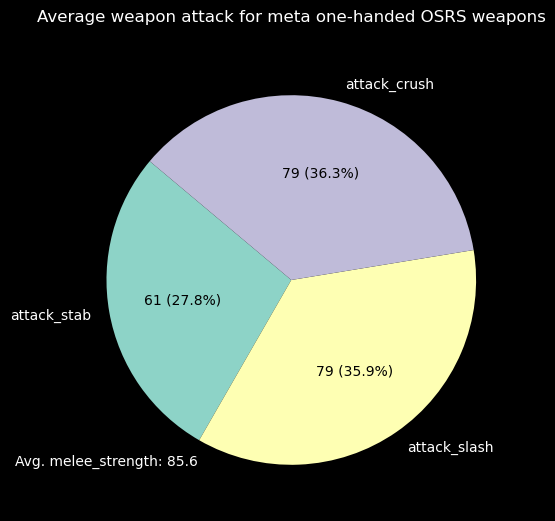

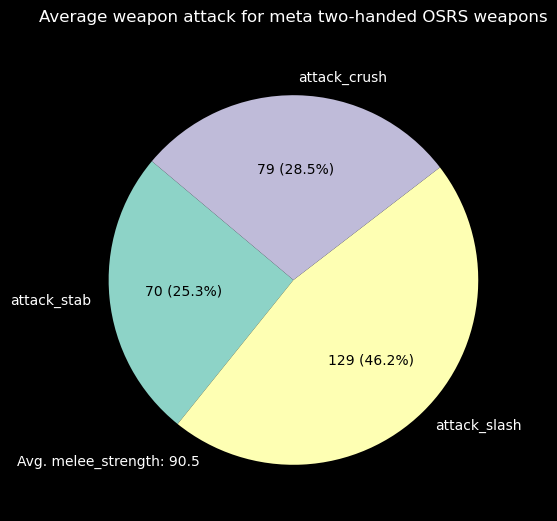

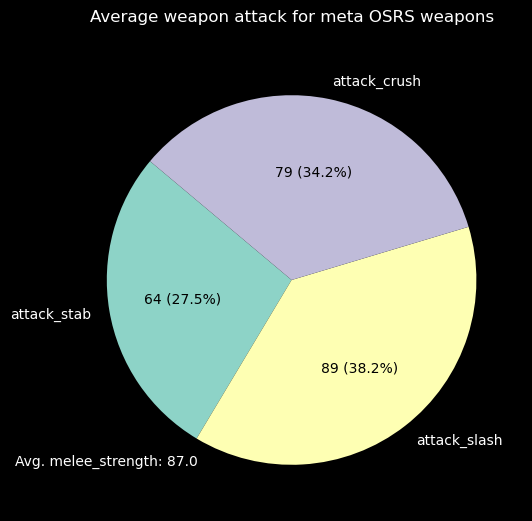

In [46]:
def create_attack_pie_chart(stat_averages, title, fname):
    filtered_data = {k: v for k, v in stat_averages.items() if k != "melee_strength"}
    labels = filtered_data.keys()
    sizes = filtered_data.values()
    
    plt.style.use('dark_background')
    
    plt.figure(figsize=(8, 6))
    _, _, autotexts = plt.pie(
        sizes, labels=labels,
        autopct=lambda p: f'{int(p * sum(sizes) / 100)} ({p:.1f}%)', startangle=140
    )
    
    for autotext in autotexts:
        autotext.set_color('black')
        
    plt.title(title, pad=20)
    plt.text(-1, -1, f'Avg. melee_strength: {stat_averages["melee_strength"]}', fontsize=10, ha='center')
    
    plt.savefig(f'.\images\\{fname}.png')
    plt.show()


create_attack_pie_chart(stat_averages, "Average weapon attack for meta one-handed OSRS weapons", "meta_1h_pie")
create_attack_pie_chart(two_hand_stat_averages, "Average weapon attack for meta two-handed OSRS weapons", "meta_2h_pie")
create_attack_pie_chart(combined_averages, "Average weapon attack for meta OSRS weapons", "meta_combined_pie")

In [47]:
"""Generates relational tuple of lists containing weapon stats from the JSON datasets for use in ternary plots. Some OSRS weapons have minor negative values in certain attack types, these have been replaced with zero due to limitations with mpltern.
"""


def get_attack_and_strength_relational_data(weapons):
    attack_stab = []
    attack_slash = []
    attack_crush = []
    melee_strength = []
    weapon_names = []

    for weapon_id, weapon_info in weapons.items():
        stab_stat = weapon_info["equipment"]["attack_stab"]
        slash_stat = weapon_info["equipment"]["attack_slash"]
        crush_stat = weapon_info["equipment"]["attack_crush"]
        melee_stat = weapon_info["equipment"]["melee_strength"]
        weapon_name = weapon_info["name"]

        if stab_stat < 0:
            attack_stab.append(0)
        else:
            attack_stab.append(stab_stat)

        if slash_stat < 0:
            attack_slash.append(0)
        else:
            attack_slash.append(slash_stat)

        if crush_stat < 0:
            attack_crush.append(0)
        else:
            attack_crush.append(crush_stat)

        melee_strength.append(melee_stat)
        weapon_names.append(weapon_name)

    return (attack_stab, attack_slash, attack_crush, melee_strength, weapon_names)


t, l, r, v, names = get_attack_and_strength_relational_data(meta_weapons)
t2, l2, r2, v2, names2 = get_attack_and_strength_relational_data(meta_two_hand_weapons)

print(len(t))
print(len(l))
print(len(r))
print(len(v))

10
10
10
10


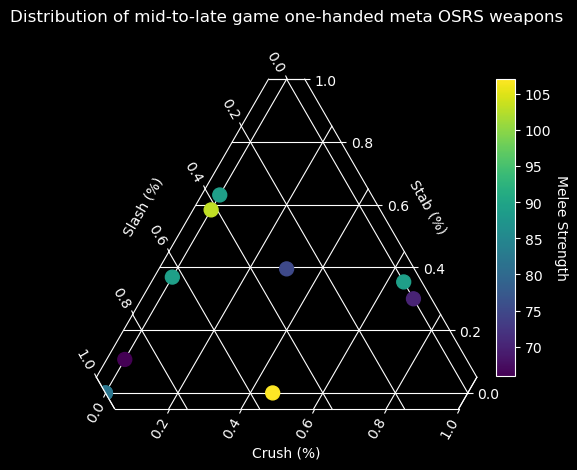

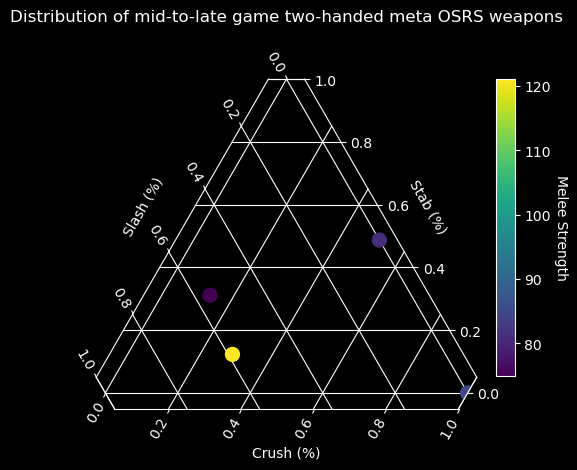

In [ ]:
def create_ternary_scatter_plot(t, l, r, v, title, fname):
    fig = plt.figure(figsize=(10.8, 4.8))
    ax = fig.add_subplot(1, 2, 1, projection='ternary')
    plt.style.use('dark_background')
    
    scatter = ax.scatter(t, l, r, c=v, s=100)

    ax.set_title(title, pad=20)
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_tlabel("Stab (%)")
    ax.set_llabel("Slash (%)")
    ax.set_rlabel("Crush (%)")
    ax.set_tlim(-0.05, 1)
    ax.set_llim(-0.05, 1)
    ax.set_rlim(-0.05, 1)
    ax.taxis.set_label_position("tick1")
    ax.laxis.set_label_position("tick1")
    ax.raxis.set_label_position("tick1")

    cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
    colorbar = fig.colorbar(scatter, cax=cax)
    colorbar.set_label('Melee Strength', rotation=270, va='baseline')
    
    plt.savefig(f'.\images\\{fname}.png')
    plt.show()


create_ternary_scatter_plot(t, l, r, v, "Distribution of mid-to-late game one-handed meta OSRS weapons", "meta_1h_ternary")
create_ternary_scatter_plot(t2, l2, r2, v2, "Distribution of mid-to-late game two-handed meta OSRS weapons", "meta_2h_ternary")
create_ternary_scatter_plot(t + t2, l + l2, r + r2, v + v2, "Distribution of mid-to-late game meta OSRS weapons", "meta_combined_ternary")

In [39]:
def create_stacked_scatter_plot(t, l, r, v, title, fname):
    fig, ax = plt.subplots(figsize=(10.8, 4.8))
    plt.style.use('dark_background')
    
    ax.scatter(v, l, label='Slash Attack', s=100)
    ax.scatter(v, t, label='Stab Attack', c='lightcoral', s=100)
    ax.scatter(v, r, label='Crush Attack', s=100)

    ax.set_title(title, pad=20)
    ax.set_xlabel('Melee Strength')
    ax.set_ylabel('Attack')
    ax.legend()
    ax.set_axisbelow(True)
    ax.grid(True)
    
    plt.savefig(f'.\images\\{fname}.png')
    plt.show()


create_stacked_scatter_plot(t, l, r, v, "Distribution of mid-to-late game one-handed meta OSRS weapons", 'meta_1h_stacked')
create_stacked_scatter_plot(t2, l2, r2, v2, "Distribution of mid-to-late game two-handed meta OSRS weapons", 'meta_2h_stacked')
create_stacked_scatter_plot(t + t2, l + l2, r + r2, v + v2, "Distribution of mid-to-late game meta OSRS weapons", 'meta_combined_stacked')